In [1]:
import numpy as np
from pprint import pprint

import os
from pathlib import Path
from dwsimopt.utils import PATH2DWSIMOPT

dir_path = str(Path(os.getcwd()).parent.absolute())
print(dir_path)

import sys
sys.path.append(dir_path)
if 'dwsimopt.sim_opt' in sys.modules:  # Is the module in the register?
    del sys.modules['dwsimopt.sim_opt']  # If so, remove it.
    del SimulationOptimization
from dwsimopt.sim_opt import SimulationOptimization

d:\DoutoradoUEM\PESQUISA\dwsimopt


In [2]:
# Getting DWSIM path from system path
path2dwsim = []
for k,v in enumerate(os.environ['path'].split(';')):
    if v.find('\DWSIM')>-1:
        path2dwsim = os.path.join(v, '')
if path2dwsim == []:
    path2dwsim = input(r"Please, input the path to your DWSIM installation, usually C:\Users\UserName\AppData\Local\DWSIM7")   #insert manuall
    if path2dwsim[-1] not in '\/':
        path2dwsim += r'/'
# path2dwsim = ""   #insert manuall
print(path2dwsim)

# Loading DWSIM simulation into Python (Simulation object)
sim_smr = SimulationOptimization(dof=np.array([]), path2sim= os.path.join(dir_path, "examples\\SMR_LNG\\SMR.dwxmz"), 
                     path2dwsim = path2dwsim, savepath = os.path.join(dir_path, "examples\\SMR_LNG\\SMR2.dwxmz"))
sim_smr.add_refs()

# Instanciate automation manager object
from DWSIM.Automation import Automation2
if ('interf' not in locals()):    # create automation manager
    interf = Automation2()

# Connect simulation in sim.path2sim
sim_smr.connect(interf)

C:\Users\lfsfr\AppData\Local\DWSIM731\
added refs
Simulation was loaded successfully


In [3]:
from dwsimopt.py2dwsim import * 

# Assign DoF:
create_pddx( ["MR-1", "CompoundMassFlow", "Nitrogen", "kg/s"],    sim_smr, element="dof" )
create_pddx( ["MR-1", "CompoundMassFlow", "Methane", "kg/s"],     sim_smr, element="dof" )
create_pddx( ["MR-1", "CompoundMassFlow", "Ethane", "kg/s"],      sim_smr, element="dof" )
create_pddx( ["MR-1", "CompoundMassFlow", "Propane", "kg/s"],     sim_smr, element="dof" )
create_pddx( ["MR-1", "CompoundMassFlow", "Isopentane", "Pa"],    sim_smr, element="dof" )
create_pddx( ["VALV-01", "OutletPressure", "Mixture", "Pa"],      sim_smr, element="dof" )
create_pddx( ["COMP-4", "OutletPressure", "Mixture", "Pa"],       sim_smr, element="dof" )
create_pddx( ["COOL-08", "OutletTemperature", "Mixture", "K"],    sim_smr, element="dof" )

# Assign F
create_pddx( ["Sum_W", "EnergyFlow", "Mixture", "kW"], sim_smr, element="fobj" )

# adding constraints (g_i <= 0):
g1 = create_pddx( ["MITA1-Calc", "OutputVariable", "mita", "°C"], sim_smr, element="constraint", assign=False )
assign_pddx( lambda: 3-g1[0]() , ["MITA1-Calc", "OutputVariable", "mita", "°C"], sim_smr, element="constraint" )
g2 = create_pddx( ["MITA2-Calc", "OutputVariable", "mita", "°C"], sim_smr, element="constraint", assign=False )
assign_pddx( lambda: 3-g2[0]() , ["MITA2-Calc", "OutputVariable", "mita", "°C"], sim_smr, element="constraint" )
# assign_pddx( lambda: 3 - min(g2[0](),g1[0]()), ["MITA_Overall", "OutputVariable", 'mita', "°C"], sim_smr, element="constraint" )


pprint(vars(sim_smr))

Successfully added to <dwsimopt.sim_opt.SimulationOptimization object at 0x000001B2ACF02430> a dof pddx function for CompoundMassFlow of Nitrogen (if applicable) from MR-1 in kg/s (if applicable)
Successfully added to <dwsimopt.sim_opt.SimulationOptimization object at 0x000001B2ACF02430> a dof pddx function for CompoundMassFlow of Methane (if applicable) from MR-1 in kg/s (if applicable)
Successfully added to <dwsimopt.sim_opt.SimulationOptimization object at 0x000001B2ACF02430> a dof pddx function for CompoundMassFlow of Ethane (if applicable) from MR-1 in kg/s (if applicable)
Successfully added to <dwsimopt.sim_opt.SimulationOptimization object at 0x000001B2ACF02430> a dof pddx function for CompoundMassFlow of Propane (if applicable) from MR-1 in kg/s (if applicable)
Successfully added to <dwsimopt.sim_opt.SimulationOptimization object at 0x000001B2ACF02430> a dof pddx function for CompoundMassFlow of Isopentane (if applicable) from MR-1 in Pa (if applicable)
Successfully added to <d

In [4]:
# Initial simulation optimization setup
# Initial guess of optimization
x0 = np.array( [0.25/3600, 0.70/3600, 1.0/3600, 1.10/3600, 1.80/3600, 2.50e5, 50.0e5, -60+273.15] )

# Testing for simulation at x0
sim_smr.calculate_optProblem(1.0*x0)
print(sim_smr.x_val,
      sim_smr.f_val,
      sim_smr.g_val)

# Test saving simulation at x0 in 'savepath'
sim_smr.interface.SaveFlowsheet(sim_smr.flowsheet,sim_smr.savepath,True)

# Inspecting simulation object
pprint(vars(sim_smr))

opt_functions calculation at x = [6.94444444e-05 1.94444444e-04 2.77777778e-04 3.05555556e-04
 5.00000000e-04 2.50000000e+05 5.00000000e+06 2.13150000e+02]
               Simulation converged in 3 iterations
f = [0.38910439], g = [-1.78887878 -3.47846713] at x = [6.94444444e-05 1.94444444e-04 2.77777778e-04 3.05555556e-04
 5.00000000e-04 2.50000000e+05 5.00000000e+06 2.13150000e+02]
[6.94444444e-05 1.94444444e-04 2.77777778e-04 3.05555556e-04
 5.00000000e-04 2.50000000e+05 5.00000000e+06 2.13150000e+02] [0.38910439] [-1.78887878 -3.47846713]
{'dof': array([[<function _toDwsim.<locals>.<lambda> at 0x000001B2C4B841F0>,
        'MR-1', 'CompoundMassFlow', 'Nitrogen', 'kg/s'],
       [<function _toDwsim.<locals>.<lambda> at 0x000001B2C4B84280>,
        'MR-1', 'CompoundMassFlow', 'Methane', 'kg/s'],
       [<function _toDwsim.<locals>.<lambda> at 0x000001B2C4B84820>,
        'MR-1', 'CompoundMassFlow', 'Ethane', 'kg/s'],
       [<function _toDwsim.<locals>.<lambda> at 0x000001B2C4B848B0>,


In [5]:
# Setup for optimization
# decision variables bounds
bounds_raw = np.array( [0.75*np.asarray(x0), 1.25*np.asarray(x0)] )   # 50 % around base case
bounds_raw[0][-1] = 153     # precool temperature low limit manually
bounds_raw[1][-1] = 253     # precool temperature upper limit manually
# regularizer calculation
regularizer = np.ones(x0.size)
# bounds regularized
bounds_reg = regularizer*bounds_raw

In [16]:
# Global optimization with PSO
from sko.PSO import PSO

# f_pen = lambda x: fpen_barrier(sim_smr,x/regularizer)
result_pso = PSO(func= lambda x: sim_smr.fpen_barrier(x/regularizer), n_dim=sim_smr.n_dof, pop=2*sim_smr.n_dof, max_iter=50, lb=bounds_reg[0], ub=bounds_reg[1], verbose=True)
result_pso.record_mode = True
if sim_smr.n_f > 1:
    print("Multi-objective optimization not supported (yet)")
elif sim_smr.n_f < 1:
    print("Invalid number of objective functions")
else:
    print("Starting global optimization")
    result_pso.run()

opt_functions calculation at x = [7.43304947e-05 1.55524633e-04 2.80072997e-04 3.39594106e-04
 4.01685841e-04 2.85922046e+05 5.54858683e+06 2.03661898e+02]
               Simulation converged in 4 iterations
f = [0.35135405], g = [ 1.45554791 -2.48066917] at x = [7.43304947e-05 1.55524633e-04 2.80072997e-04 3.39594106e-04
 4.01685841e-04 2.85922046e+05 5.54858683e+06 2.03661898e+02]
opt_functions calculation at x = [5.76537145e-05 1.97663831e-04 2.45805522e-04 3.76770958e-04
 4.62893405e-04 1.96532049e+05 4.89743161e+06 1.78196713e+02]
               Simulation converged in 4 iterations
f = [0.42421113], g = [-3.83596328 -4.22260747] at x = [5.76537145e-05 1.97663831e-04 2.45805522e-04 3.76770958e-04
 4.62893405e-04 1.96532049e+05 4.89743161e+06 1.78196713e+02]
opt_functions calculation at x = [6.70351634e-05 1.53929188e-04 2.79749180e-04 3.22966736e-04
 4.79821209e-04 1.91758756e+05 4.28842671e+06 1.57957375e+02]
               Simulation converged in 4 iterations
f = [0.38707573], g 

opt_functions calculation at x = [5.20833333e-05 1.75285894e-04 2.48194755e-04 3.81944444e-04
 3.75000000e-04 3.12500000e+05 5.20180594e+06 2.41355811e+02]
               Simulation converged in 3 iterations
f = [0.33369147], g = [-1.14420881e-01 -8.31556500e-05] at x = [5.20833333e-05 1.75285894e-04 2.48194755e-04 3.81944444e-04
 3.75000000e-04 3.12500000e+05 5.20180594e+06 2.41355811e+02]
[0.33369147]
f = [0.33369147], g = [-1.14420881e-01 -8.31556500e-05] at x = [5.20833333e-05 1.75285894e-04 2.48194755e-04 3.81944444e-04
 3.75000000e-04 3.12500000e+05 5.20180594e+06 2.41355811e+02]
[-1.14420881e-01 -8.31556500e-05]
[5.20833333e-05 1.75285894e-04 2.48194755e-04 3.81944444e-04
 3.75000000e-04 3.12500000e+05 5.20180594e+06 2.41355811e+02]


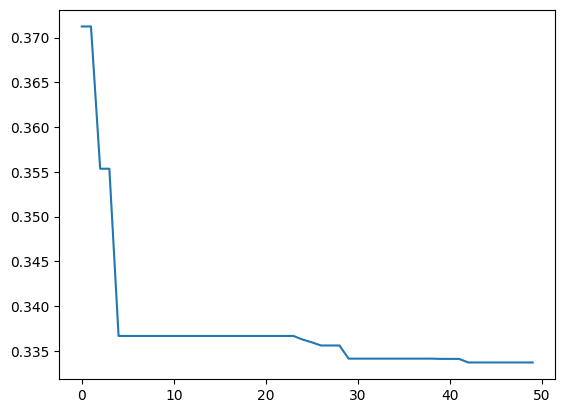

In [18]:
import matplotlib.pyplot as plt

print(f(result_pso.gbest_x))
print(g(result_pso.gbest_x))
sim_smr.interface.SaveFlowsheet(sim_smr.flowsheet, sim_smr.savepath, True)
print(result_pso.gbest_x)
pprint(result_pso)

plt.plot(result_pso.gbest_y_hist)
plt.show()

In [ ]:
# Global optimization with GA
from sko.GA import GA

# f_pen = lambda x: fpen_barrier(sim_smr,x/regularizer)
result_GA = GA(func= lambda x: sim_smr.fpen_barrier(x/regularizer), n_dim=sim_smr.n_dof, pop=sim_smr.n_dof, max_iter=2, lb=bounds_reg[0], ub=bounds_reg[1], verbose=True)
result_GA.record_mode = True
if sim_smr.n_f > 1:
    print("Multi-objective optimization not supported (yet)")
elif sim_smr.n_f < 1:
    print("Invalid number of objective functions")
else:
    print("Starting global optimization")
    result_GA.run()

import matplotlib.pyplot as plt

print(f(result_GA.gbest_x))
print(g(result_GA.gbest_x))
sim_smr.interface.SaveFlowsheet(sim_smr.flowsheet, sim_smr.savepath, True)
print(result_GA.gbest_x)
pprint(result_GA)

plt.plot(result_GA.gbest_y_hist)
plt.show()